In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division, print_function

# Testing hypotheses

- This module investigates the use of data science and statistics
to answer questions about the process that generated data we observe.

- Key concepts in this module:

    * Formulation of a question: *hypothesis test*
    * Evaluating the evidence for or against the question: *test statistic*
    * What are the chances: *permutation distribution*


## Lady Tasting Tea


- This is a famous example of R. A. Fisher.

- A lady declares that by tasting a cup of tea made with milk 
she can discriminate whether
the milk or the tea infusion was first added to the cup.

<img src="https://dl.dropboxusercontent.com/u/2785709/brainder/2015/tastingtea/tea_cups.png">

### Experiment

- She is asked to taste eight cups, four of each type.

- Cups are presented in a random order.

- She correctly identifies the type of 6 out of 8 cups.

- Do you think she can really tell the difference?


## A representation of the experiment

- Let her choices either `T` or `M`. She must make 8 choices, 4 of which will be `T` and
4 of which will be `M`.

- The true types of the tea are also `T` or `M`.

- Here is an example of how we might describe the experiment

In [68]:
lady = ['M', 'T', 'M', 'T', 'T', 'T', 'M', 'M']
truth = ['M', 'M', 'M', 'T', 'T', 'T', 'T', 'M']
number_correct = sum([l == t for l, t in zip(lady, truth)])
number_correct

6

## A mental model

- The variables `lady` and `truth` are just two outcomes for the experiment
in which the lady correctly identifies exactly 6 of the cups of tea.

- Is this unusual? How many other outcomes for her choices are there?

- How many other outcomes for her choices are there where she correctly identifies 6 or more?

### Permutations

- A *permutation* of a list is a reordering of the list.

- The set of all possible outcomes for `lady` is the set of all
reorderings of the list `lady`.

In [65]:
from itertools import permutations
original_list = range(3)
original_list

[0, 1, 2]

In [66]:
[reordering for reordering in permutations(original_list)]

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0)]

### Let us count the ways...

In [67]:
number_outcomes, exactly_six, six_or_more = 0, 0, 0
for lady_permuted in permutations(lady):
    number_outcomes += 1
    number_match = np.sum([l == t for l, t in zip(lady_permuted, truth)])
    exactly_six += (number_match == 6)
    six_or_more += (number_match >= 6)
    
number_outcomes, exactly_six, six_or_more

(40320, 9216, 9792)

### What if there was no difference between the cups of tea?

- If the lady could really tell no difference between the two,
then any one of 40320 possible outcomes for her choices should
reasonably be considered equally likely.

- There were 9792 such outcomes in which she would have 
correctly identified 6 or more.

- As the choices are equally likely, the chances that she would
correctly identify 6 or more are
$$
\frac{9792}{40320} \approx 24\%.
$$

- Not that rare an occurence. The chances she would correctly identify exactly 6 is about 23%!

#### Food for thought: why didn't we also permute the `truth`?

In [6]:
six_or_more / number_outcomes, exactly_six / number_outcomes

(0.24285714285714285, 0.22857142857142856)

## More data?

- The percentage of 75% seemed pretty impressive until we computed the chances
we would see such an impressive rate.

- What if she had correctly identified 60 out of 80 cups of tea?

- In this case, the number of reorderings is huge, about $10^{118}$!

- Our mental model is still valid: if the lady actually has no ability
to tell the difference between the two types of teas, then any of these
orderings is equally likely, whatever `truth` is.

- We can get a sense of how impressive this is by choosing several reorderings
at random and computing the number of matches.

In [69]:
lady = ['T']*40 + ['M']*40
truth = ['T']*40 + ['M']*40
lady[:10]

['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']

In [81]:
def more_than_60(number_permutations):
    exactly_sixty, sixty_or_more = 0, 0
    matches = []
    for _ in range(number_permutations):
        lady_reordering = np.random.choice(lady, 
                                           size=len(lady), 
                                           replace=False)
        number_match = np.sum([l == t for l, t in zip(lady_reordering, 
                                                      truth)])
        exactly_sixty += (number_match == 60)
        sixty_or_more += (number_match >= 60)
        matches.append(number_match)
    return matches, exactly_sixty, sixty_or_more

more_than_60(5000)[1:]

(0, 0)

### Maybe she does know what she's doing...

- We would really have been impressed by a 75% rate if she had tasted 80 cups of tea!

- We sometimes (though not always) saw 1 reorderings out of 50000 with a success rate of 75%.

- The probability 1/50000 might not be a great estimate of how likely she
would be to achieve a success rate of 75% or higher if she really could not
distinguish between the cups of tea.

- BUT, it certainly gives strong evidence that our mental model may be wrong...

### A visual summary

- Instead of just computing the chances above, we could record the number
of matches for each reordering of `lady` and produce a histogram.

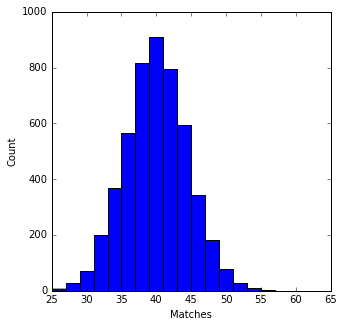

In [90]:
f = plt.figure(figsize=(5,5))
ax = f.gca()
ax.hist(more_than_60(5000)[0], bins=np.linspace(25,61,19));
ax.set_xlabel('Matches');
ax.set_ylabel('Count')

## The null hypothesis

- Our mental model above represents how we might model the experiment
under the assumption that the lady really cannot distinguish
between different the different types.

- In statistics, we call this the *null hypothesis*.

- The permutations above represented different outcomes for our experiment.

- Under our null hypothesis, each of these outcomes was equally likely. This allowed us to compute the chances that the lady would have such a success rate of 75% or higher if she really could not tell the difference (i.e. *assuming the null hypothesis was correct.*) 

- For 6/8, the chances were about 25%, we were not very impressed. If she had achieved 60/80, we really would have been impressed. In other words, *observing something rare under the null hypothesis is evidence against the null hypothesis.*

- This is the rationale in hypothesis tests.

# A second scenario

- [A/B testing](http://getdatadriven.com/ab-significance-test) is a tool used by companies to determine the effectiveness of different strategies to attract customers.

- Here is an [example](http://getdatadriven.com/ab-significance-test) found with an easy web search.

- A company tries two strategies: 
     * 1000 customers directed to page A, with 90 successful outcomes (i.e. clickthroughs).
     * 1000 customers directed to page B, with 120 successful outcomes (i.e. clickthroughs).

- Is there a difference between the strategies?



In [10]:
strategy_A = [0]*910 + [1]*90
strategy_B = [0]*880 + [1]*120

## Mental model

- Suppose that the 1000 customers in each arm are randomly sampled from some population. (*This assumption might not be true in practice! It is notoriously hard to obtain a random sample from a population...*)

- Suppose there is no difference between the two strategies. (*This is the null hypothesis in this example.*)

- Then, if we make one big data set of size 2000 with 210 successes and then randomly assign 1000 to `A` and the rest to `B` we will have outcomes that were as likely as the observed outcome.

- What summary should we use? A reasonable summary would seem to be the difference
between the successes between arms `A` and `B`.

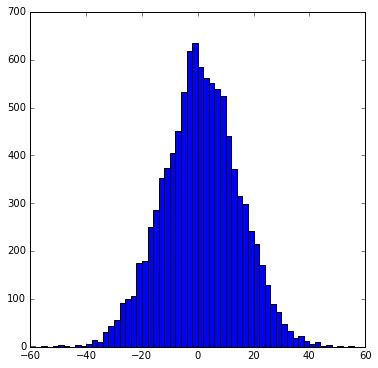

In [22]:
pooled = strategy_A + strategy_B
number_trial = 10000
difference = np.zeros(number_trial)

for i in range(number_trial):
    np.random.shuffle(pooled)
    outcome_A = pooled[:1000] # first 1000 entries are A
    outcome_B = pooled[1000:] # the rest are B
    difference[i] = np.sum(outcome_A) - np.sum(outcome_B)

difference = np.array(difference)
f = plt.figure(figsize=(6,6))
ax = f.gca()
ax.hist(difference, bins=np.linspace(-60,60,61));

### What are the chances?

We observed a difference with absolute value |120-90| = 30.


Out of our 5000 different reorderings, how often was the difference in the number of successes
greater than or equal to 30 (in absolute value)?

In [12]:
np.mean(np.fabs(difference) >= 30)

0.034599999999999999

This is pretty unlikely. Maybe our null hypothesis is not true...

# A different method

- If we knew the relative success in each arm, we might
be able evaluate the chances above in a different way.

- For instance, suppose the true success rate in arm A was 10% in arm B it was 11%.

- In arm A the number of click-throughs can be described by tossing 1000 coins each with a 10% chance
of heads.

- In arm B the number of click-throughs can be described by tossing 1000 coins each with a 11% chance
of heads.


In [13]:
from code.probability import Binomial, BoxModel
trialA = BoxModel([1] + [0]*9)
trialA.mass_function

{0: 0.8999999999999999, 1: 0.1}

In [14]:
armA = Binomial(1000, trialA, event_spec=[1])
print("A trial: %d" % armA.trial())
print("A sample of size 10: %s" % armA.sample(10))

A trial: 101
A sample of size 10: [97, 106, 88, 79, 91, 96, 90, 101, 93, 97]


In [15]:
trialB = BoxModel([1]*11 + [0]*89)
armB = Binomial(1000, trialB, event_spec=[1])

def absolute_difference(armA, armB):
    return np.fabs(armA.trial() - armB.trial())

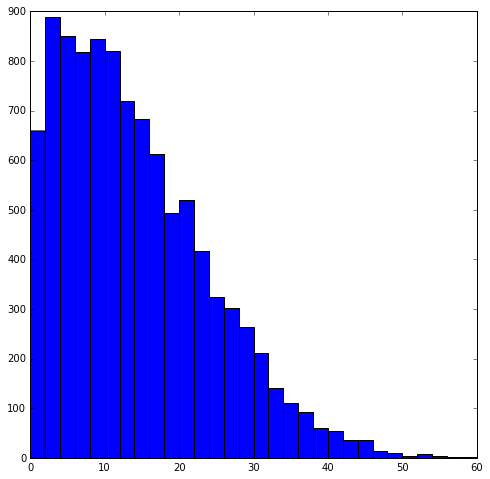

In [16]:
sample_differences = np.array([absolute_difference(armA, armB) for _ in range(10000)])
f = plt.figure(figsize=(8,8))
ax = f.gca()
ax.hist(sample_differences, bins=np.linspace(0,60,31));

# What are the chances?

- We see that if this were the true model that generated the data
there would be about a 8% chance of seeing an absolute difference of more than 30.

- In this example, the absolute difference is a **test statistic**.

- With models for arm A and arm B we are able to create a **sampling distribution** for the test statistic.

- Using the sampling distribution we can evaluate the chances of seeing such a large number of differences.

In [17]:
np.mean(sample_differences >= 30)

0.078399999999999997

# What is the right model?

- In our hypothetical example, we assumed that arm A had a success rate of 10%, and arm B had a success
rate of 11%. 

- In practice, we will not know this. 

- If we had to estimate a success rate in arm A our best guess would be 9%, and 12% in arm B.

- What if we had to estimate a success rate **if we believe the two arms have the same success rate**?

- We would probably estimate it to be 10.5%, the average of the two success rates.

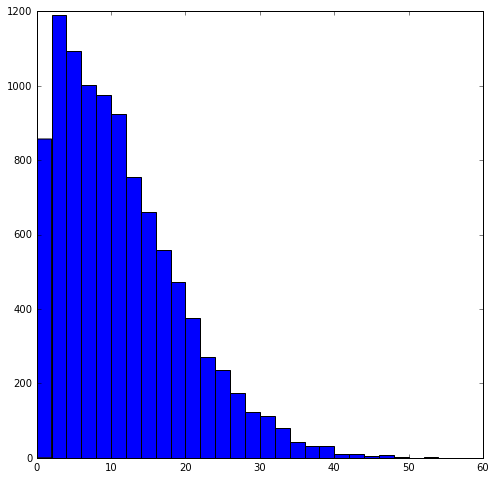

In [18]:
trial = BoxModel([1]*210+[0]*1790)
armA = Binomial(1000, trial, event_spec=[1])
armB = Binomial(1000, trial, event_spec=[1])
sample_differences = np.array([absolute_difference(armA, armB) for _ in range(10000)])
f = plt.figure(figsize=(8,8))
ax = f.gca()
ax.hist(sample_differences, bins=np.linspace(0,60,31));

In [19]:
print(np.mean(sample_differences >= 30))

0.0335


## Mental model

- We saw that we get a very similar result for computing the chances
this way as with the permutation method.

- We came up with a way to generate data that matched
our observed data **assuming the success probabilities in the two arms are the same.**

- This assumption made us propose using each arm having 10.5% success as the *correct model*.

- Statisticians call this the model for the **null distribution**: what the typical differences
look like if both success probabilities were the same.

- Note that the typical difference also depends on the success rate, that's why we used 10.5%.

- Suppose we used a success rate of 40%.

0.1786


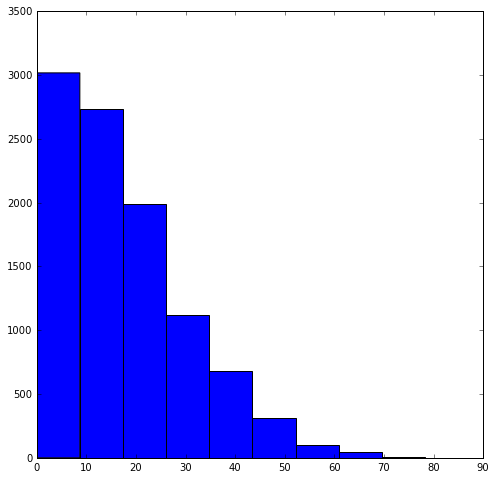

In [20]:
trial = BoxModel([1]*400+[0]*600)
armA = Binomial(1000, trial, event_spec=[1])
armB = Binomial(1000, trial, event_spec=[1])
sample_differences = np.array([absolute_difference(armA, armB) for _ in range(10000)])
f = plt.figure(figsize=(8,8))
ax = f.gca()
print(np.mean(sample_differences >= 30))
ax.hist(sample_differences);